In [1]:
!unzip data/data.zip

Archive:  data/data.zip
   creating: paper/
  inflating: paper/73.jpg            
  inflating: paper/56.jpg            
  inflating: paper/35.jpg            
  inflating: paper/86.jpg            
  inflating: paper/61.jpg            
  inflating: paper/14.jpg            
  inflating: paper/54.jpg            
  inflating: paper/57.jpg            
  inflating: paper/84.jpg            
  inflating: paper/94.jpg            
  inflating: paper/47.jpg            
  inflating: paper/88.jpg            
  inflating: paper/67.jpg            
  inflating: paper/51.jpg            
  inflating: paper/21.jpg            
  inflating: paper/48.jpg            
  inflating: paper/1.jpg             
  inflating: paper/43.jpg            
  inflating: paper/13.jpg            
  inflating: paper/69.jpg            
  inflating: paper/28.jpg            
  inflating: paper/17.jpg            
  inflating: paper/81.jpg            
  inflating: paper/62.jpg            
  inflating: paper/45.jpg            
  infl

In [22]:
input()

123123


'123123'

In [21]:
from PIL import Image
import glob
import os

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
    
files = ['scissor', 'paper', 'rock']

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
for file in files:
    image_dir_path = os.getenv("HOME") + "/"+ file
    resize_images(image_dir_path)

    print(f"{file} 이미지 resize 완료!")

100  images to be resized.
100  images resized.
scissor 이미지 resize 완료!
100  images to be resized.
100  images resized.
paper 이미지 resize 완료!
100  images to be resized.
100  images resized.
rock 이미지 resize 완료!


In [27]:
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화
x_test_norm = x_train_norm
print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


라벨:  0


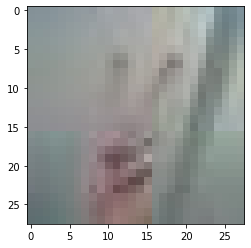

In [11]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
print('라벨: ', y_train[0])

In [31]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
# [[YOUR CODE]]
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))
model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                25632     
_________________________________________________________________
dense_3 (Dense)              (

In [32]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.compile()과 model.fit()을 사용해 봅시다.
# [[YOUR CODE]]
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=10)

Before Reshape - x_train_norm shape: (300, 28, 28, 3)
Epoch 1/10
10/10 [==============================] - 27s 12ms/step - loss: 2.2148 - accuracy: 0.1933
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 1.8091 - accuracy: 0.3700
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 1.3602 - accuracy: 0.3333
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 1.1782 - accuracy: 0.3433
Epoch 5/10
10/10 [==============================] - 0s 3ms/step - loss: 1.1398 - accuracy: 0.3333
Epoch 6/10
10/10 [==============================] - 0s 3ms/step - loss: 1.1089 - accuracy: 0.3500
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 1.1196 - accuracy: 0.3367
Epoch 8/10
10/10 [==============================] - 0s 4ms/step - loss: 1.1163 - accuracy: 0.3167
Epoch 9/10
10/10 [==============================] - 0s 3ms/step - loss: 1.1238 - accuracy: 0.3200
Epoch 10/10
10/10 [==============================] - 0s 3ms/st

In [33]:
# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.
# [[YOUR CODE]]
x_test_norm
y_train 

10/10 - 0s - loss: 1.0925 - accuracy: 0.3333
test_loss: 1.0924928188323975 
test_accuracy: 0.3333333432674408


In [35]:

test_loss, test_accuracy = model.evaluate(x_test_norm,y_train, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 1.0925 - accuracy: 0.3333
test_loss: 1.0924928188323975 
test_accuracy: 0.3333333432674408
